---------------------------------------

# $SPA$tial $G$rap$H$s: n$ET$works, $T$opology, & $I$nference

## Tutorial for `pysal.spaghetti`: Working with point patterns: empirical observations
#### James D. Gaboardi [<jgaboardi@fsu.edu>]

1. Instantiating a `pysal.spaghetti.Network`
2. Allocating observations to a network
    * snapping
3. Visualizing original and snapped locations
    * visualization with `networkx`

In [1]:
import os
last_modified = None
if os.name == "posix":
    last_modified = !stat -f\
                    "# This notebook was last updated: %Sm"\
                     Spaghetti_Pointpatterns_Empirical.ipynb
elif os.name == "nt":
    last_modified = !for %a in (Spaghetti_Pointpatterns_Empirical.ipynb)\
                    do echo # This notebook was last updated: %~ta
    
if last_modified:
    get_ipython().set_next_input(last_modified[-1])

In [ ]:
# This notebook was last updated: Aug 20 16:49:32 2018

In [2]:
# This notebook was last updated: Aug 20 15:07:47 2018

-----------------

In [3]:
import spaghetti as spgh
from libpysal import examples
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx
from collections import OrderedDict

% matplotlib inline

__author__ = "James Gaboardi <jgaboardi@gmail.com>"

# 1. Instantiating a `pysal.spaghetti.Network`
### Instantiate the network from `.shp` file

In [4]:
ntw = spgh.Network(in_data=examples.get_path('streets.shp'))

# 2. Allocating observations to a network
### Snap point patterns to the network

In [5]:
# Crimes with attributes
ntw.snapobservations(examples.get_path('crimes.shp'), 'crimes', attribute=True)
# Schools without attributes
ntw.snapobservations(examples.get_path('schools.shp'), 'schools', attribute=False)

### A network is composed of a single topological representation of a road and $n$ point patterns which are snapped to the network.

In [6]:
ntw.pointpatterns

{'crimes': <spaghetti.network.PointPattern at 0x1a14c1fcf8>,
 'schools': <spaghetti.network.PointPattern at 0x1a14c1fc88>}

In [7]:
dir(ntw.pointpatterns['crimes'])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'dist_to_node',
 'npoints',
 'obs_to_edge',
 'obs_to_node',
 'points',
 'snapped_coordinates']

### Attributes for every point pattern

1. `dist_to_node` dict keyed by pointID with the value being a dict in the form 
        {node: distance to node, node: distance to node}
2. `obs_to_edge` dict keyed by edgeID (tuple) with the value being a dict in the form 
        {pointID:(x-coord, y-coord), pointID:(x-coord, y-coord), ... }
3. `obs_to_node` dict keyed by nodeID with the value being a list of pointIDs
        {nodeID:[pointID]}
4. `points` geojson like representation of the point pattern.  Includes properties if read with attributes=True.
        {pointID: {'coordinates': (x-coord, y-coord), 'properties': [[attributes, attributes,...]]}
5. `snapped_coordinates` dict keyed by pointID with the value being (x-coord, y-coord)
        {pointID: (x-coord, y-coord)}

# 3. Visualizing original and snapped locations

## School locations

In [8]:
school_points = ntw.pointpatterns['schools'].points
print(type(school_points))
print(school_points[0])

<class 'dict'>
{'coordinates': (727082.0462136, 879863.260705768), 'properties': None}


### **  The original coordinates of the schools need to be extracted from `school_points`

In [9]:
schools = range(len(school_points))
school_coords = {school:school_points[school]["coordinates"] for school in schools}
print(type(school_coords))
print(school_coords[0])

<class 'dict'>
(727082.0462136, 879863.260705768)


## Snapped school locations

In [10]:
snapped_school_coords = ntw.pointpatterns['schools'].snapped_coordinates
print(type(snapped_school_coords))
print(snapped_school_coords[0])

<class 'dict'>
(727287.6644417326, 879867.3863186113)


## Crime locations

In [11]:
crime_points = ntw.pointpatterns['crimes'].points
print(type(crime_points))
print(crime_points[0])

<class 'dict'>
{'coordinates': (727913.0000000029, 875720.9999999977), 'properties': [[1, 1]]}


### **  The original coordinates of the schools need to be extracted from `school_points`

In [12]:
crimes = range(len(crime_points))
crime_coords = {crime:crime_points[crime]["coordinates"] for crime in crimes}
print(type(crime_coords))
print(crime_coords[0])

<class 'dict'>
(727913.0000000029, 875720.9999999977)


## Snapped school locations

In [13]:
snapped_crime_coords = ntw.pointpatterns['crimes'].snapped_coordinates
print(type(snapped_crime_coords))
print(snapped_crime_coords[0])

<class 'dict'>
(727919.2473619275, 875942.4986759046)


## Plotting with `networkx`

### ** This is 5 `networkx.Graph` objects plotted together

/Users/jgaboardi/miniconda3/envs/py3_spgh_dev/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/jgaboardi/miniconda3/envs/py3_spgh_dev/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/Users/jgaboardi/miniconda3/envs/py3_spgh_dev/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/Users/jgaboardi/miniconda3/envs/py3_spgh_dev/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Fut

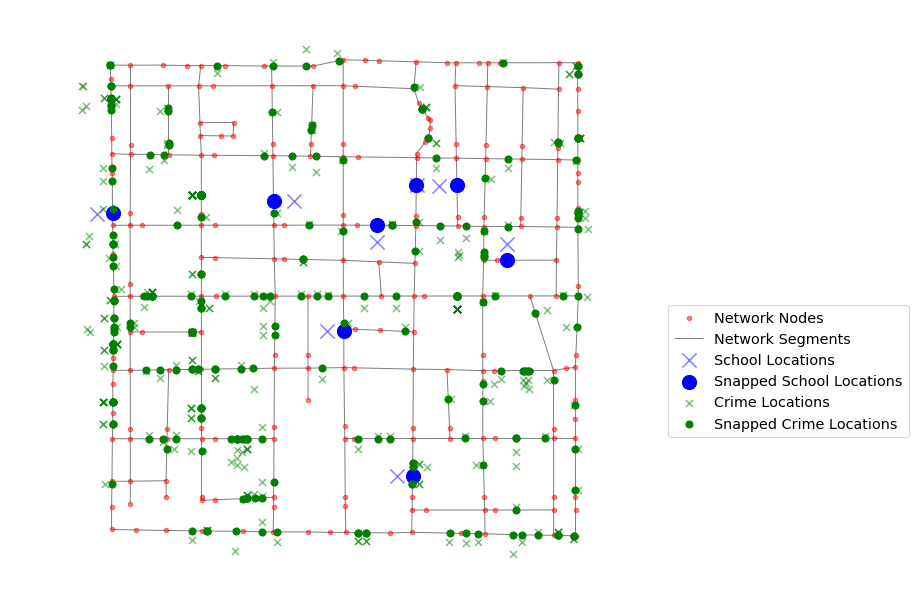

In [14]:
plt.figure(figsize=(8,8))

# Graph edges & nodes
g1 = nx.Graph()
for e in ntw.edges:
    g1.add_edge(*e)
for n, p in ntw.node_coords.items():
    g1.add_node(n, pos=p)
nx.draw(g1, ntw.node_coords, node_size=20, alpha=0.5)

# School locations
g2 = nx.Graph()
for n, p in school_coords.items():
    #g2.node[n].update({n:p})
    g2.add_node(n, pos=p)
nx.draw(g2, school_coords, node_size=200, node_shape='x', alpha=.5, node_color='blue')

# School locations snapped to the network
g3 = nx.Graph()
for n, p in snapped_school_coords.items():
    g3.add_node(n, pos=p)
nx.draw(g3, snapped_school_coords, node_size=200, alpha=1.0, node_color='blue')

# Crime locations
g4 = nx.Graph()
for n, p in crime_coords.items():
    g4.add_node(n, pos=p)
nx.draw(g4, crime_coords, node_size=50, node_shape='x', alpha=.5, node_color='green')

# Crime locations snapped to the network
g5 = nx.Graph()
for n, p in snapped_crime_coords.items():
    g5.add_node(n, pos=p)
nx.draw(g5, snapped_crime_coords, node_size=50, alpha=1.0, node_color='green')

leg = OrderedDict()
leg['Network Nodes']=g1
leg['Network Segments']=g1
leg['School Locations']=g2
leg['Snapped School Locations']=g3
leg['Crime Locations']=g4
leg['Snapped Crime Locations']=g5
plt.legend(leg, loc='best', fancybox=True, framealpha=0.8,
           scatterpoints=1, fontsize="x-large", bbox_to_anchor=(1.5, .5))

-----------